

## House Prices: Advanced Regression Techniques



---

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# LOAD DATA

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
df = pd.concat([train,test], ignore_index = True, sort = False)
print(train.shape, test.shape, df.shape)


(1460, 82) (1459, 81) (2919, 82)


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [4]:
# to drop ID column
df.drop(['Id'],axis =1,inplace=True)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# EXPLORATORY DATA ANALYSIS

## Plotting Corelations

In [8]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420
BsmtFinSF2,-0.072530,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,...,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883,-0.011378


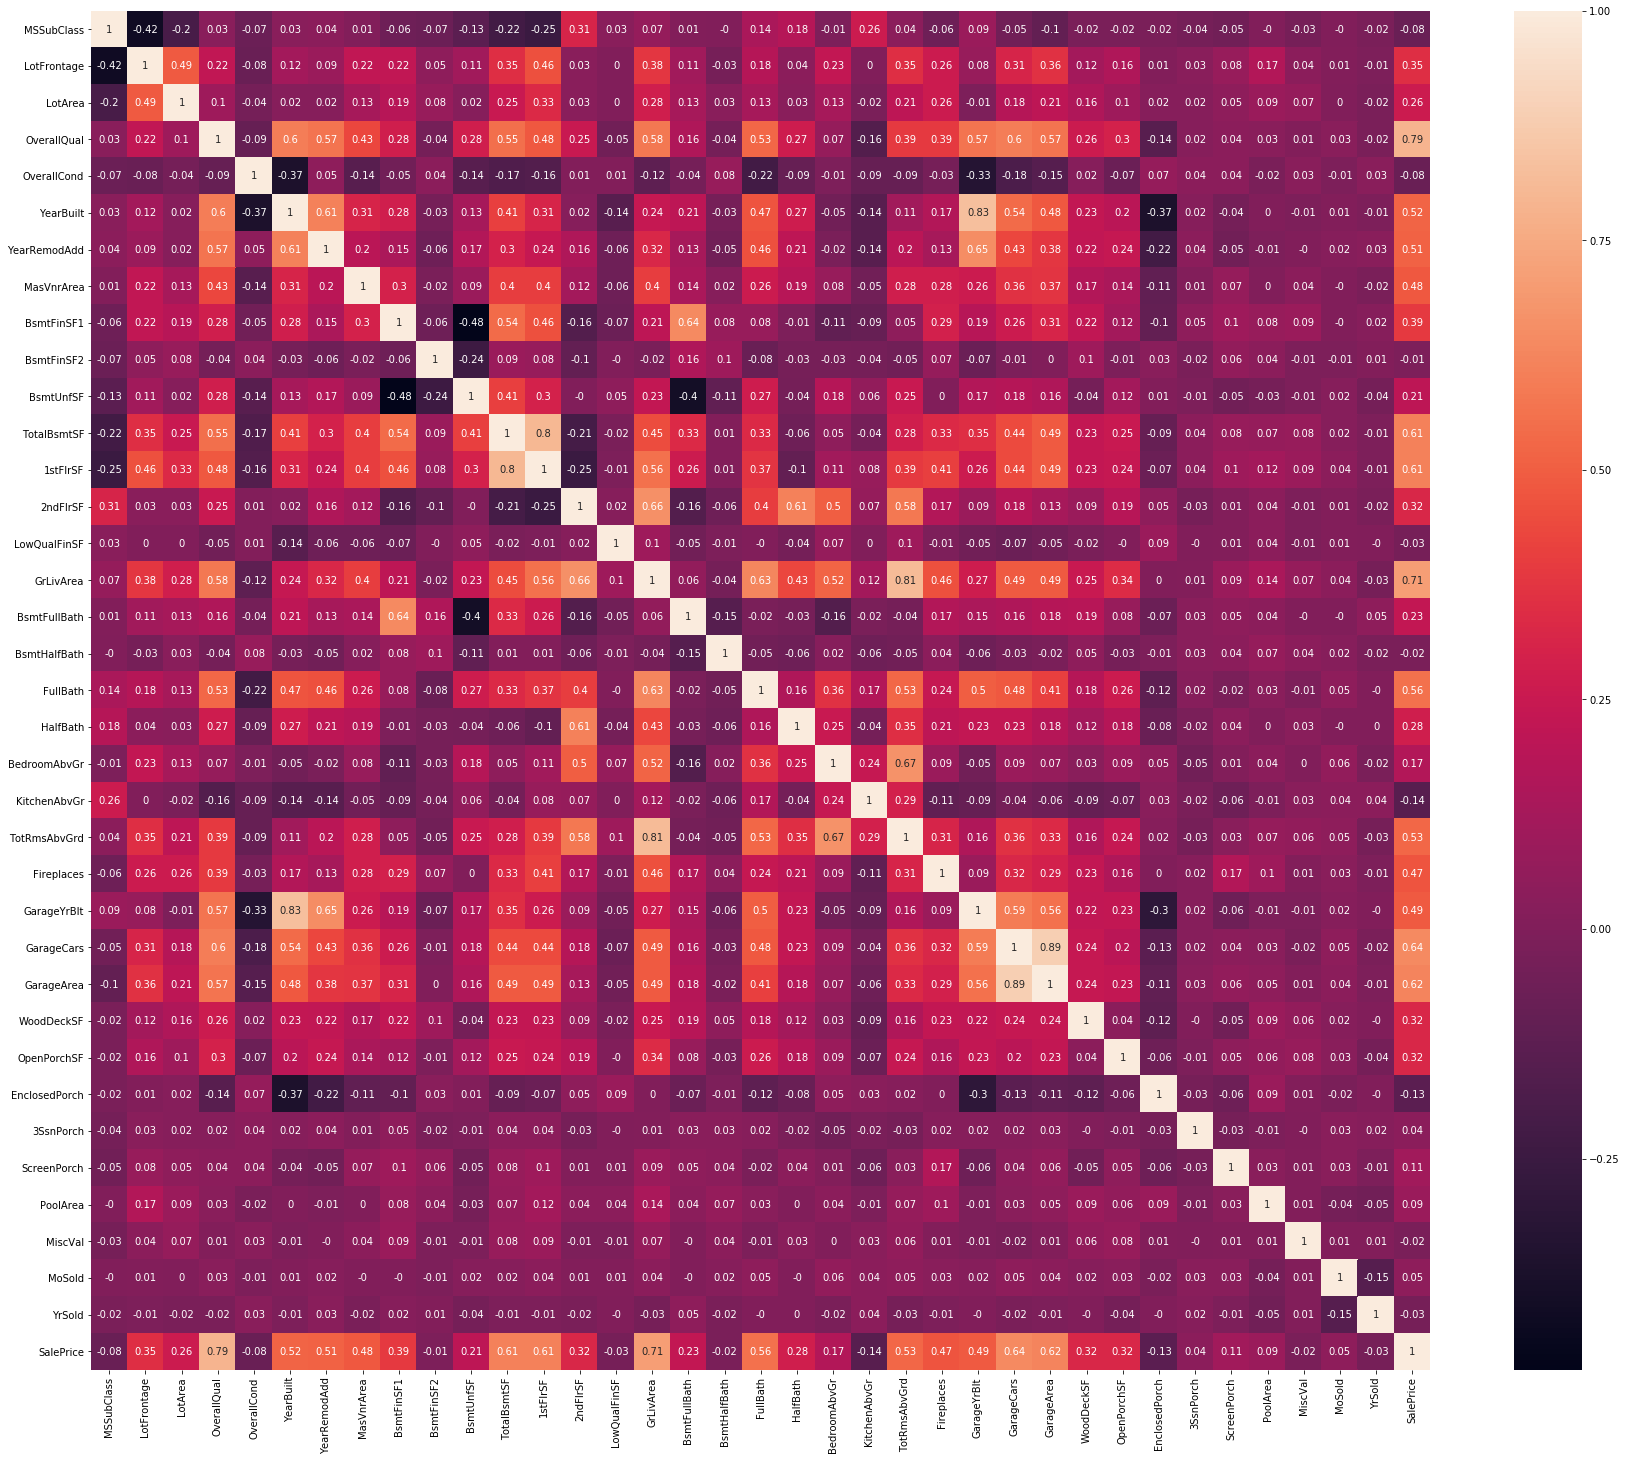

In [9]:
plt.subplots(figsize=(30,25))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

From the above figure we can infer that:

“GarageCars” has strong positive correlation with “GarageArea”  and " BsmtUnfSF" has strong negative correlation with “BsmtFinSF1”.
“BsmtFinSF2”,“Id”,"BsmtHalfBath","MiscVal","Yrsold" and "LowQualFinSF" has almost no correlation with “SalePrice”.
Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features if we are applying Linear Regression model to the dataset but not mandatory.

## Plotting Boxplot For Outlier Identification

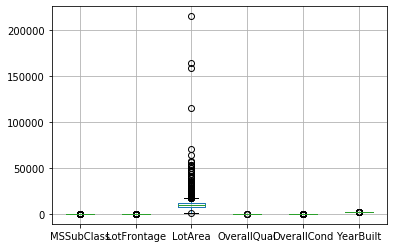

In [10]:
boxplot = df.boxplot(column=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt'])

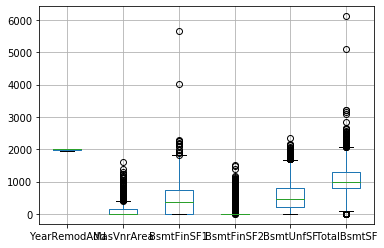

In [11]:
boxplot = df.boxplot(column=['YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'])

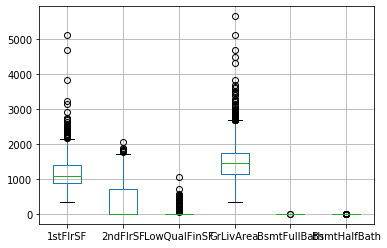

In [12]:
boxplot = df.boxplot(column=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath'])

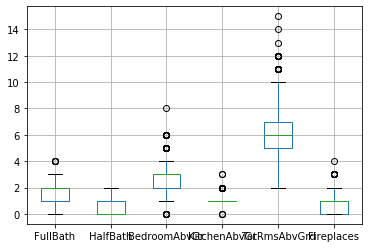

In [13]:
boxplot = df.boxplot(column=['FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces'])

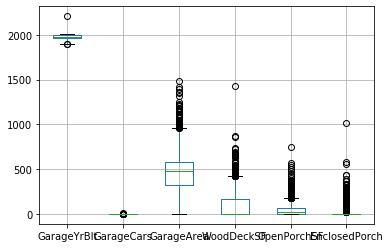

In [14]:
boxplot = df.boxplot(column=['GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch'])

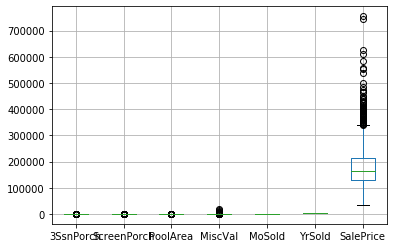

In [15]:
boxplot = df.boxplot(column=['3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'])

## Plotting Numerical Column Against SalesPrice Using Scatterplots

In [16]:
# Convert 'MSSubClass' column to type(str)
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MSSubClass'].dtype

dtype('O')

In [17]:
# Create list of numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [18]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')


 36 numerical columns


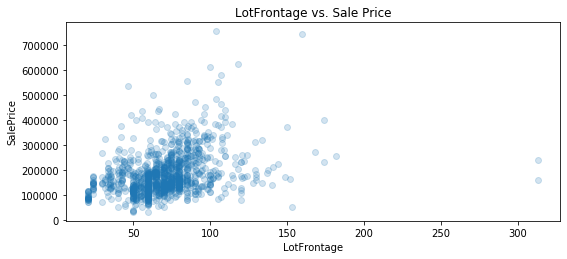

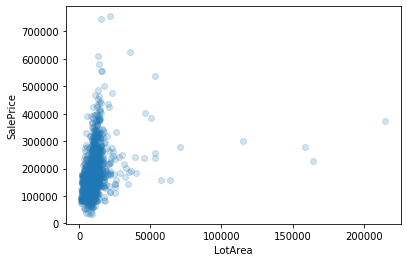

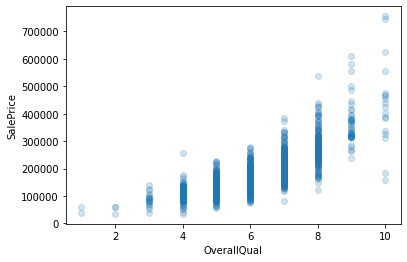

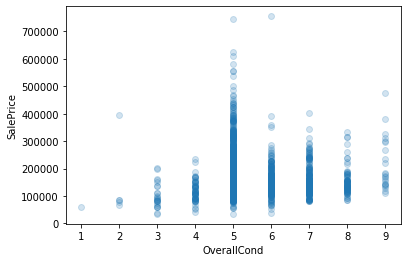

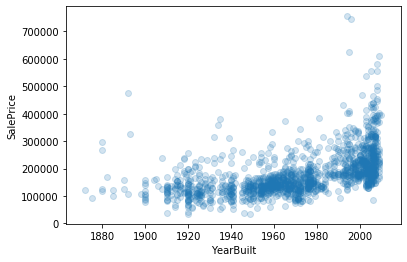

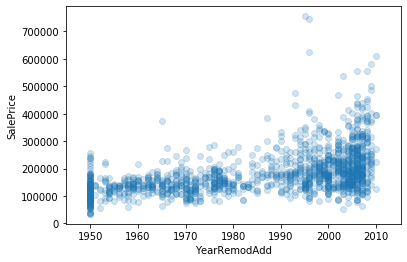

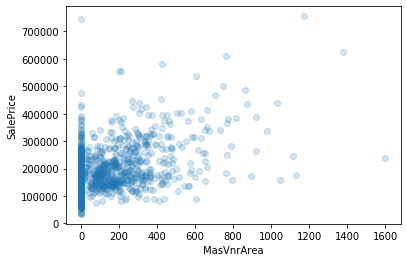

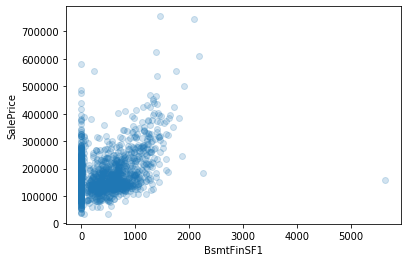

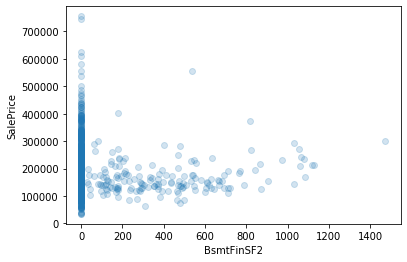

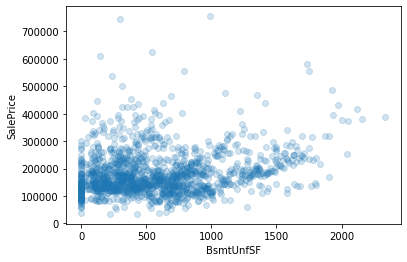

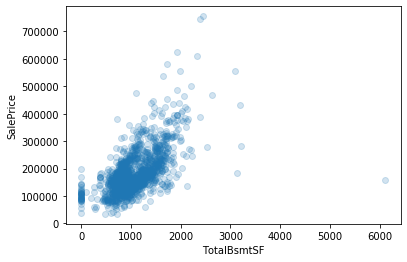

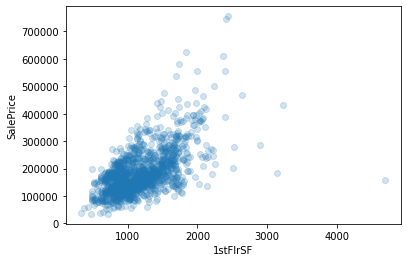

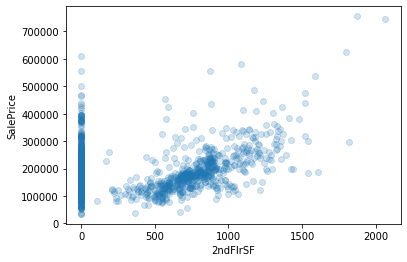

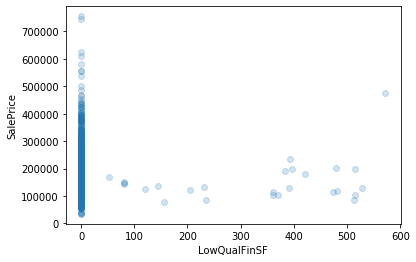

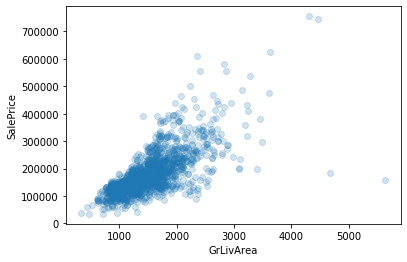

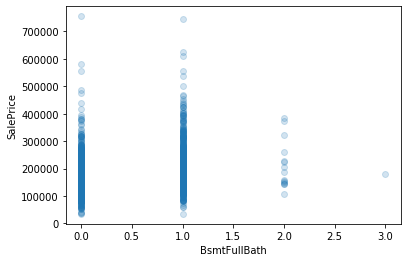

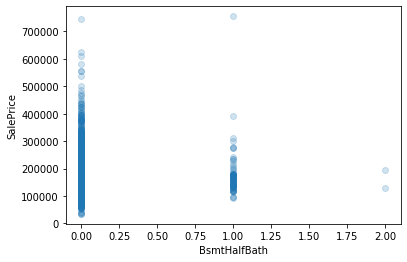

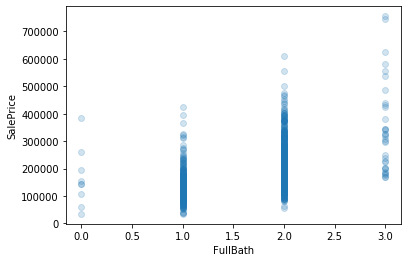

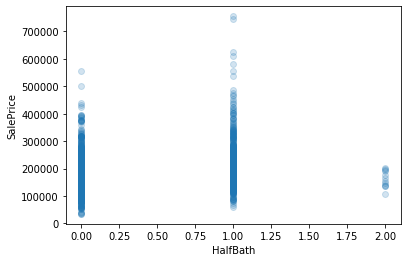

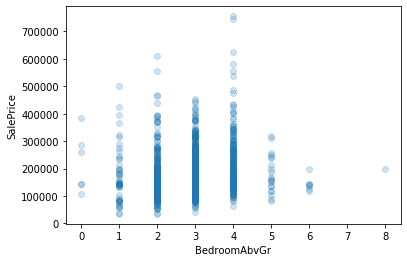

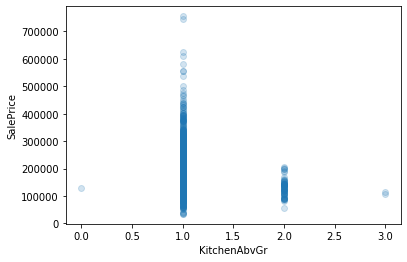

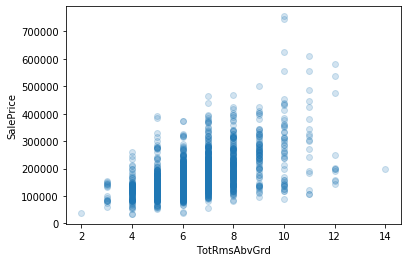

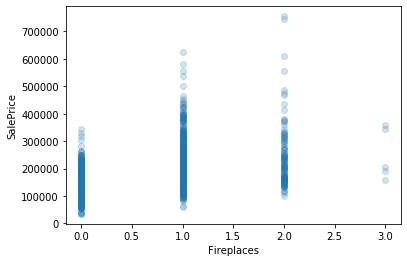

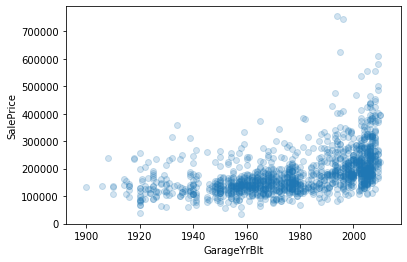

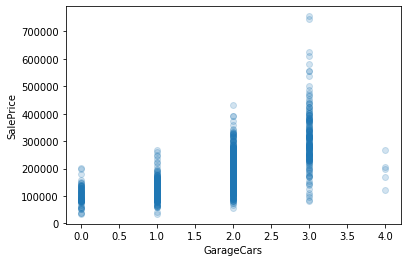

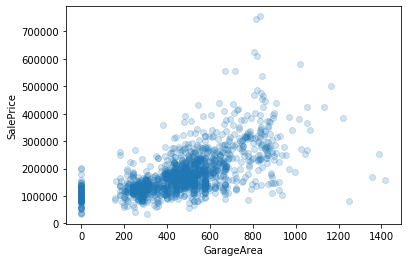

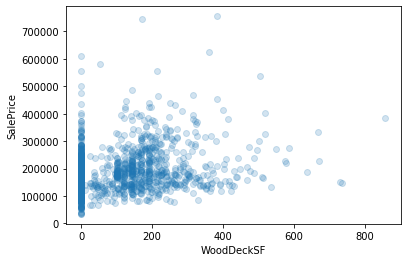

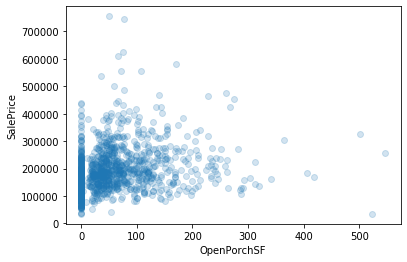

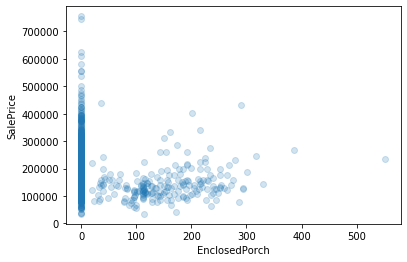

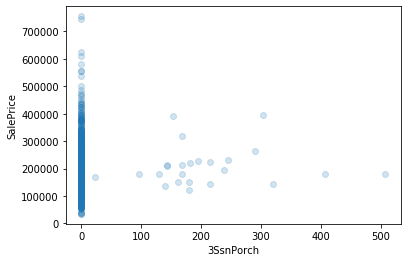

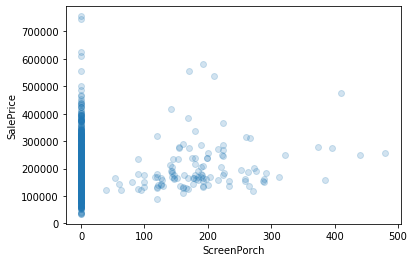

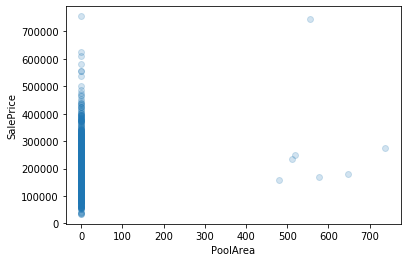

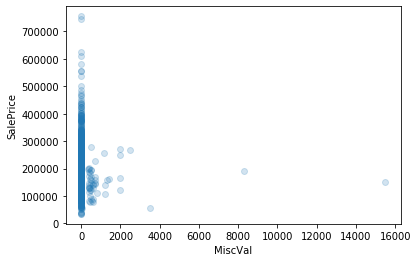

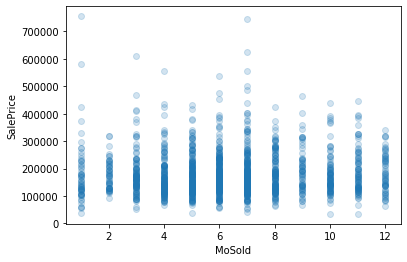

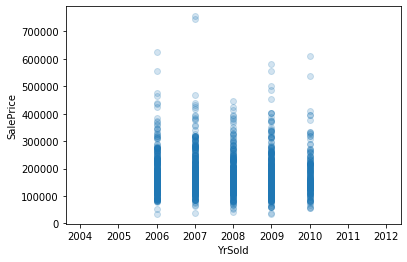

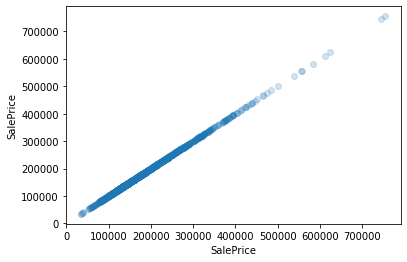

In [19]:
def draw_scatters(df, variables, n_rows, n_cols):
 fig=plt.figure(figsize=(15,60))
 for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='SalePrice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs. Sale Price")
        fig.tight_layout()
        plt.savefig('scatters.png')
        plt.show()
        
draw_scatters(df, numeric_columns[:37], int(len(numeric_columns[:-1])/2)+1, 2)#Limited to 5 Columns

## Plotting Categorical Column Against SalesPrice Using Barplots

In [20]:
# Create list of categorical columns
cat_columns = df.select_dtypes(include=[object]).columns.tolist()
print(cat_columns)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'source']


In [21]:
# Print how many categorical columns so figure out plot grid
print(len(cat_columns), 'categorical columns')


45 categorical columns


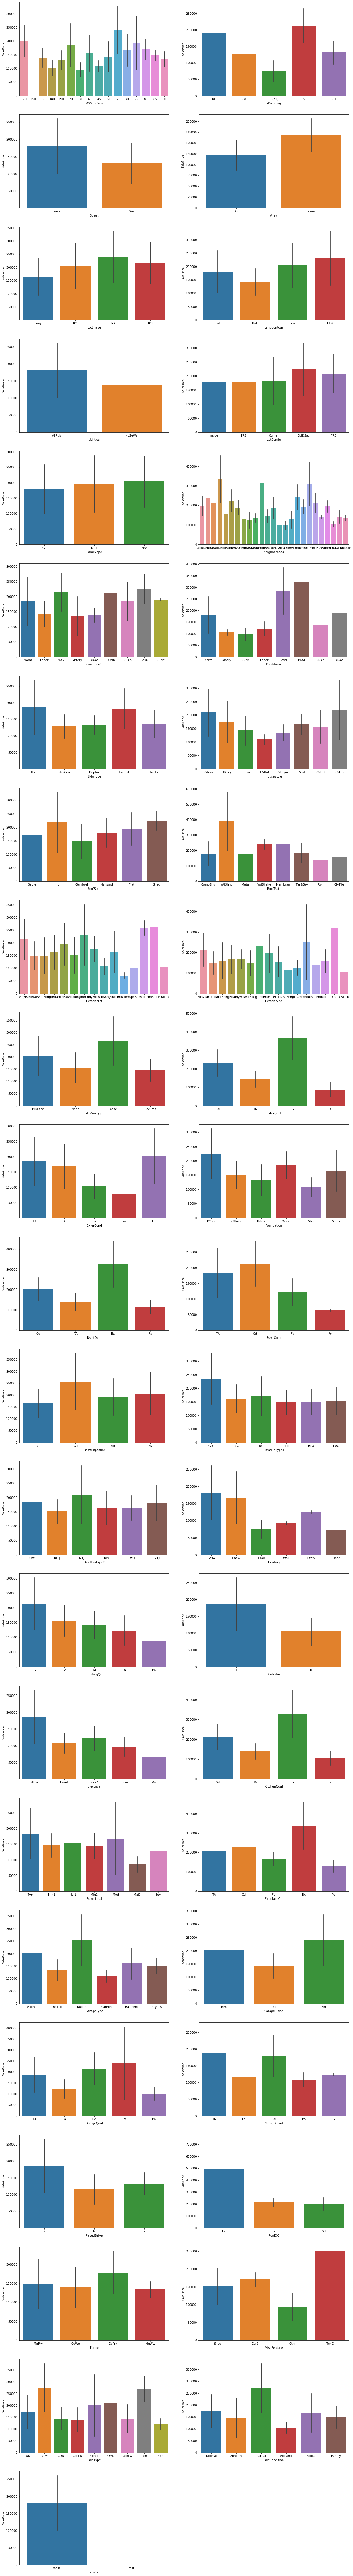

In [22]:
# Draw bar plots of categorical data
def draw_bar(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,160))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.barplot(x=var_name,y='SalePrice',data=df,ci='sd')
        if var_name in ['neighborhood','exterior_1st','exterior_2nd']:
            plt.sca(ax)
            plt.xticks(rotation=70)
            ax.set_title(var_name)
            fig.tight_layout()
 #plt.savefig('bars.png')
            plt.show()
    
draw_bar(df, cat_columns, int(len(cat_columns)/2)+1, 2)

# PREPROCESSING

## Fill Missing Data

In [23]:
# Columns with null (np.nan) values
nan_col_list = df.columns[df.isnull().any()].tolist()
nan_col_list

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [24]:
# Sum of nan values of each column
nulls = df[nan_col_list].isnull().sum()
nulls

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

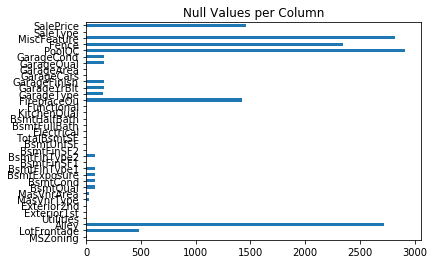

In [25]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [26]:
# Find how many missing values and percentage missing in each column
# This gives me an idea of priority
print('Missing data in each dataframe column:')
for col in df.columns:
    missing_data = len(df) - df[col].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(df))) * 
 100, 3)), '% of total')

Missing data in each dataframe column:
MSZoning : 4 missing values is 0.137 % of total
LotFrontage : 486 missing values is 16.65 % of total
Alley : 2721 missing values is 93.217 % of total
Utilities : 2 missing values is 0.069 % of total
Exterior1st : 1 missing values is 0.034 % of total
Exterior2nd : 1 missing values is 0.034 % of total
MasVnrType : 24 missing values is 0.822 % of total
MasVnrArea : 23 missing values is 0.788 % of total
BsmtQual : 81 missing values is 2.775 % of total
BsmtCond : 82 missing values is 2.809 % of total
BsmtExposure : 82 missing values is 2.809 % of total
BsmtFinType1 : 79 missing values is 2.706 % of total
BsmtFinSF1 : 1 missing values is 0.034 % of total
BsmtFinType2 : 80 missing values is 2.741 % of total
BsmtFinSF2 : 1 missing values is 0.034 % of total
BsmtUnfSF : 1 missing values is 0.034 % of total
TotalBsmtSF : 1 missing values is 0.034 % of total
Electrical : 1 missing values is 0.034 % of total
BsmtFullBath : 2 missing values is 0.069 % of total

In [27]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
     scale=df[col].std(),
     size=df[col].isnull().sum()).astype(int)

In [28]:
# Use random number generator to create a series of numbers based on 'GarageYrBlt' statistics
garage_yr_blt_rand = make_randoms(df,'GarageYrBlt')
garage_yr_blt_rand

array([1968, 1991, 1970, 1982, 1981, 1962, 1997, 2020, 1973, 1963, 1969,
       1997, 2008, 1981, 1985, 1919, 1923, 1963, 1942, 1998, 2010, 1967,
       2008, 1961, 1991, 1961, 1987, 1951, 1995, 1972, 1982, 1964, 2032,
       1977, 1957, 1931, 2024, 1983, 1988, 1956, 1965, 1972, 2003, 1990,
       1960, 1991, 2015, 1929, 1975, 1957, 2001, 1962, 1978, 2015, 1983,
       1988, 1981, 1962, 1943, 2003, 1976, 2010, 1945, 2011, 2009, 1998,
       1997, 1962, 1987, 1990, 1954, 1950, 1983, 1988, 1987, 1988, 1994,
       1969, 1965, 1989, 2008, 1987, 2004, 1983, 1957, 1997, 1960, 1975,
       1947, 1978, 1952, 1951, 1931, 1986, 1958, 1975, 1938, 1942, 1990,
       1940, 1995, 1992, 1950, 2015, 1984, 1978, 1961, 2007, 1961, 1969,
       2020, 1970, 1980, 1938, 1914, 1991, 1948, 1973, 1960, 2021, 1948,
       1939, 2001, 1999, 1971, 1966, 1934, 1930, 1947, 1957, 1963, 2015,
       2008, 1995, 1961, 2033, 2032, 2021, 1943, 1975, 1968, 1966, 1954,
       1958, 1967, 2013, 2009, 1950, 2014, 1928, 19

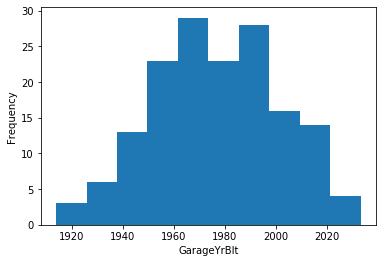

In [29]:
# Plot the random distribution of the 'GarageYrBlt' column
plt.hist(garage_yr_blt_rand)
plt.xlabel('GarageYrBlt')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(df,'LotFrontage')
lot_frontage_rand

array([ 71,  69,  56,  60,  80,  63,  89,  45,  43,  79,  98,  55,  66,
        74, 117,  58,  57,   0,  45,  77,  42, 113,  76,  88,  75,  67,
       110,  53,  67,  80,  70,  24,  74,  69,  49,  51,  59,  72,  86,
        93,  72, 105,  62,  96,  45,  68,  78, 128, 102,  58, 117,  48,
       103,  66,  64,  68,  83,  94,  92, 108,  48,  75,  57,  79,  99,
        69,  28,  71,  31,  51,  93,  79,  65,  54,   7,  44, 112, 101,
       101,  72,  60,  49,  72,  80,  77,  43,  71,  59,  54,  43,  74,
        79,  51,  81,  41, 117,  70, 131,  90,  93, 111,  37,  71,  79,
        70,  78,  90,  49,  57,  52,  92,   6,  86,  73,  89, 110,  92,
        75,  64,  40,  95,  83, 100,  97,  94,  35,  74, 104,  35,  81,
        84,  73,  65,  75,  77, 104,   1,  47,  39, 105,  72, 103,  49,
        45,  54,  59,  62,  69,  63,  94,  88,  71,  54,   6,  92,  41,
        67,  81,  50,  40,  63,  81,  75,  97,  79,  48,  88,  60, 115,
        81,  83, 104,  15,  47,  97,  57,  91,  64,  96,  66,  8

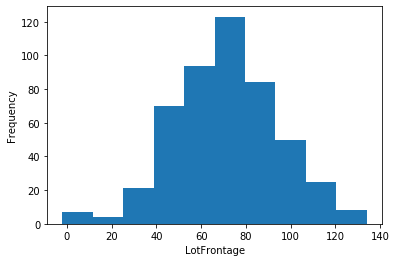

In [31]:
# Plot the random distribution of the 'LotFrontage' column
plt.hist(lot_frontage_rand)
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Replace the NaNs with teh random data 

df['LotFrontage'] = df['LotFrontage'].fillna('9999')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('9999')
df.loc[df['LotFrontage']=='9999','LotFrontage'] = lot_frontage_rand
df.loc[df['GarageYrBlt']=='9999','GarageYrBlt'] = garage_yr_blt_rand

In [33]:
#Imputing value None

imputing_none = df[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 'GarageCond','PoolQC','Fence','MiscFeature']]
for i in list(imputing_none.columns.values):
    print("\n")
    print("Analysing the " + i)
    print(imputing_none[i].value_counts())



Analysing the Alley
Grvl    120
Pave     78
Name: Alley, dtype: int64


Analysing the BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64


Analysing the BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64


Analysing the BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64


Analysing the BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64


Analysing the BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


Analysing the FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64


Analysing the GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64


Analysing the GarageFinish
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64




In [34]:
df.update(imputing_none.fillna("None"))

In [35]:
#Imputing mode

catfeats_fillnamode = ['Electrical', 'MasVnrType']
 
df.loc[:, catfeats_fillnamode] =df[catfeats_fillnamode].fillna(df[catfeats_fillnamode].mode().iloc[0])

In [36]:
#Imputing median
Type_median_Area = df.pivot_table(index ="MasVnrType", values ="MasVnrArea" , aggfunc = "median")
def impute_median_neigh(cols):
    Mas_Vnr_Area = cols[0]
    Mas_Vnr_Type = cols[1]
    
    if pd.isnull(Mas_Vnr_Area):
        return Type_median_Area["MasVnrArea"][Type_median_Area.index == Mas_Vnr_Type]
    else:
        return Mas_Vnr_Area
print('Original #missing: %d'%sum(df["MasVnrArea"].isnull()))
df["MasVnrArea"] = df[["MasVnrArea","MasVnrType"]].apply(impute_median_neigh,axis=1).astype(float)
print('Final #missing: %d'%sum(df["MasVnrArea"].isnull()))


Original #missing: 23
Final #missing: 0


In [37]:
# Verify that all null values are gone
nan_col_list = df.columns[df.isnull().any()].tolist()
nan_col_list

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType',
 'SalePrice']

In [38]:
nan_col_list = df.columns[df.isnull().any()].tolist()
nulls = df[nan_col_list].isnull().sum()
nulls

MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64

In [39]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000.0,train


In [40]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Non-numerical Features

In [41]:
df.dtypes.value_counts()


object     47
int64      24
float64    10
dtype: int64

In [42]:
df.select_dtypes(include = [object]).columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'source'],
      dtype='object')

In [43]:
df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [44]:
df.LotShape=df.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
df.Utilities = df.Utilities.replace({'AllPub':0, 'NoSeWa':1})
df.LandSlope = df.LandSlope.replace({'Gtl':0, 'Mod':1, 'Sev':2})
df.ExterQual = df.ExterQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
df.ExterCond = df.ExterCond.replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
df.BsmtQual = df.BsmtQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'None':3,'Fa':4})
df.BsmtCond = df.BsmtCond.replace({'TA':0, 'Gd':1, 'None':2, 'Fa':3,'Po':4})
df.BsmtExposure = df.BsmtExposure.replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'None':4})
df.BsmtFinType1 = df.BsmtFinType1.replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'None':5, 'LwQ':6})
df.BsmtFinType2 = df.BsmtFinType2.replace({'Unf':0, 'BLQ':1, 'None':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df.HeatingQC = df.HeatingQC.replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
df.Electrical = df.Electrical.replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
df.KitchenQual = df.KitchenQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
df.Functional = df.Functional.replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6})
df.FireplaceQu = df.FireplaceQu.replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df.GarageFinish = df.GarageFinish.replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3})
df.GarageQual = df.GarageQual.replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
df.GarageCond = df.GarageCond.replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
df.PavedDrive = df.PavedDrive.replace({'Y':0, 'N':1, 'P':2})
df.PoolQC = df.PoolQC.replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})
df.Fence = df.Fence.replace({'None':0, 'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4})

## Categorical Features

In [45]:
df.Heating = df.Heating.replace({'GasW':"Others", 'Grav':"Others", 'Wall':"Others", 'OthW':"Others", 'Floor':"Others"})
df.Condition1 = df.Condition1.replace({'RRAn':"Others", 'PosN':"Others", 'RRAe':"Others", 'PosA':"Others", 'RRNn':"Others",'RRNe':"Others"})

In [46]:
fd = df.copy()

In [47]:
 en_s= df['source']

In [48]:
df = df.drop([ 'source'], axis = 1)

In [49]:
#convert categorical variable into dummy
#df = pd.get_dummies(en)
df = pd.get_dummies(df).reset_index(drop=True)

In [50]:
df['source']= en_s

In [51]:
df.head()

,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,source
0,8450,0,0.0,0,7,5,2003,2003,196.0,0,...,0,0,1,0,0,0,0,1,0,train
1,9600,0,0.0,0,6,8,1976,1976,0.0,1,...,0,0,1,0,0,0,0,1,0,train
2,11250,1,0.0,0,7,5,2001,2002,162.0,0,...,0,0,1,0,0,0,0,1,0,train
3,9550,1,0.0,0,7,5,1915,1970,0.0,1,...,0,0,1,1,0,0,0,0,0,train
4,14260,1,0.0,0,8,5,2000,2000,350.0,0,...,0,0,1,0,0,0,0,1,0,train


# FEATURE ENGINEERING

In [52]:
df['Remodeled'] = df['YearRemodAdd'] - df['YearBuilt']
func = lambda x: x['Remodeled'] > 0 and 1.0 or 0.0
df['Remodeled'] = df.apply(func,axis=1).astype(float)

In [53]:
df['NewHouse'] = df['YrSold'] - df['YearBuilt']
func = lambda x: x['NewHouse'] == 0 and 1.0 or 0.0
df['NewHouse'] = df.apply(func,axis=1).astype(float)

In [54]:
df['OverallSF'] = df['2ndFlrSF'] + df['TotalBsmtSF']

In [55]:
df.head()

,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,source,Remodeled,NewHouse,OverallSF
0,8450,0,0.0,0,7,5,2003,2003,196.0,0,...,0,0,0,0,1,0,train,0.0,0.0,1710.0
1,9600,0,0.0,0,6,8,1976,1976,0.0,1,...,0,0,0,0,1,0,train,0.0,0.0,1262.0
2,11250,1,0.0,0,7,5,2001,2002,162.0,0,...,0,0,0,0,1,0,train,1.0,0.0,1786.0
3,9550,1,0.0,0,7,5,1915,1970,0.0,1,...,1,0,0,0,0,0,train,1.0,0.0,1512.0
4,14260,1,0.0,0,8,5,2000,2000,350.0,0,...,0,0,0,0,1,0,train,0.0,0.0,2198.0


In [56]:
# 1* Simplifications of existing features
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [57]:
df.head(10)

,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SimplFireplaceQu,SimplFunctional,SimplKitchenQual,SimplHeatingQC,SimplBsmtFinType1,SimplBsmtFinType2,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual
0,8450,0,0.0,0,7,5,2003,2003,196.0,0,...,0,0.0,0.0,0,0,0,0,0,0,0
1,9600,0,0.0,0,6,8,1976,1976,0.0,1,...,1,0.0,1.0,0,1,0,0,0,0,1
2,11250,1,0.0,0,7,5,2001,2002,162.0,0,...,1,0.0,0.0,0,0,0,0,0,0,0
3,9550,1,0.0,0,7,5,1915,1970,0.0,1,...,1,0.0,0.0,1,1,0,1,1,0,1
4,14260,1,0.0,0,8,5,2000,2000,350.0,0,...,1,0.0,0.0,0,0,0,0,0,0,0
5,14115,1,0.0,0,5,5,1993,1995,0.0,1,...,0,0.0,1.0,0,0,0,0,0,0,1
6,10084,0,0.0,0,8,5,2004,2005,186.0,0,...,1,0.0,0.0,0,0,0,0,1,0,0
7,10382,1,0.0,0,7,6,1973,1973,240.0,1,...,1,0.0,1.0,0,1,1,0,0,0,1
8,6120,0,0.0,0,7,5,1931,1950,0.0,1,...,1,1.0,1.0,1,1,0,0,1,0,1
9,7420,0,0.0,0,5,6,1939,1950,0.0,1,...,1,0.0,1.0,0,0,0,0,1,0,1


## Modelling

In [58]:
#Divide into test and train:
X_train = df.loc[df['source']=="train"]
X_fin = df.loc[df['source']=="test"]
#Drop unnecessary columns:
#X_train.drop(['SalePrice','source'],axis=1,inplace=True)
#X_final.drop(['source'],axis=1,inplace=True)

In [59]:
X_final = X_fin.drop(['SalePrice','source'], axis = 1).to_numpy()

In [60]:
X_final.shape

(1459, 492)

In [61]:
X = X_train.drop(['SalePrice', 'source'], axis = 1).to_numpy()

In [62]:
x = X_train.drop(['SalePrice', 'source'], axis = 1)

In [63]:
y = X_train['SalePrice']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
df['source'].unique()

array(['train', 'test'], dtype=object)

## Creating and Training the Model

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation



In [70]:

# print the intercept
print(lm.intercept_)



5107427146.612189


In [71]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LotArea,5.109276e-01
LotShape,2.711534e+02
Utilities,-2.413391e+04
LandSlope,-8.418957e+01
OverallQual,1.153092e+04
OverallCond,4.975796e+03
YearBuilt,2.443495e+02
YearRemodAdd,1.549759e+02
MasVnrArea,2.160542e+01
ExterQual,1.484928e+04


## Predictions from Model


In [72]:
predictions = lm.predict(X_test)

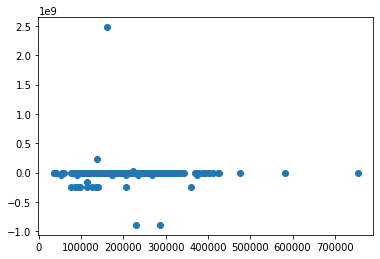

In [73]:
plt.scatter(y_test,predictions)

**Residual Histogram**

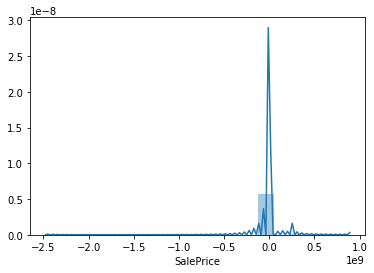

In [74]:
sns.distplot((y_test-predictions),bins=20);

## Regression Evaluation Metrics

In [75]:
from sklearn import metrics

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18465671.066912003
MSE: 1.959812834295249e+16
RMSE: 139993315.35095698


## Final Predictions 


In [77]:
np.nan_to_num(X_final)

array([[1.1622e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.4267e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.3830e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.0000e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0441e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.6270e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [78]:
#prediction_final = lm.predict(np.nan_to_num(X_final))
prediction_final = lm.predict(np.nan_to_num(X_final))

## Prediction Output 1 

In [79]:
output = pd.DataFrame({'Id':test.Id,'SalePrice':prediction_final})
output.to_csv('prediction1.csv',index=False)

## Using Random Forest Regressor

### Creating and Training the Model

In [81]:
rf_reg = RandomForestRegressor()

In [82]:
rf_reg.fit(X_train,y_train)

C:\Users\udeme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Predictions from Model


In [83]:
predictionss = rf_reg.predict(X_test)

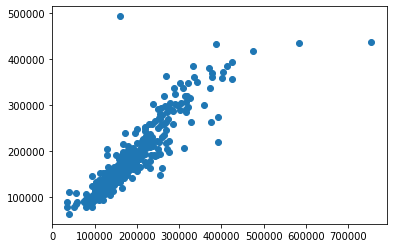

In [84]:
plt.scatter(y_test,predictionss)

**Residual Histogram**

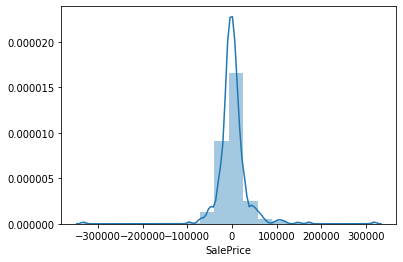

In [85]:
sns.distplot((y_test-predictionss),bins=20);

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictionss))
print('MSE:', metrics.mean_squared_error(y_test, predictionss))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionss)))

MAE: 19253.672602739724
MSE: 1237796418.577945
RMSE: 35182.33105662479


## Final Predictions 


In [77]:
np.nan_to_num(X_final)

array([[1.1622e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.4267e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.3830e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.0000e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0441e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.6270e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [90]:
#prediction_final = lm.predict(np.nan_to_num(X_final))
predictionss_final = rf_reg.predict(np.nan_to_num(X_final))

## Prediction Output 2

In [92]:
output = pd.DataFrame({'Id':test.Id,'SalePrice':predictionss_final})
output.to_csv('prediction2.csv',index=False)